In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
%matplotlib inline

C:\Users\Lenovo\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
path_train= os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
path_test= os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
train=pd.read_csv(path_train,delimiter=',')
test=pd.read_csv(path_test,delimiter=',')
train

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0
5,-2.619,1.026,-2.483,0.545,-2.347,0.064,-2.143,-0.449,-1.871,-0.866,...,-0.096,0.578,-0.000,0.238,-0.289,0.034,-0.385,-0.204,-0.385,1
6,-1.690,1.463,-1.690,1.024,-1.667,0.585,-1.576,0.125,-1.393,-0.313,...,-0.084,1.028,-0.000,0.320,-0.418,0.023,-0.460,-0.251,-0.418,1
7,0.237,1.515,-0.068,1.267,-0.271,0.909,-0.338,0.523,-0.406,0.138,...,-0.193,0.575,-0.661,-0.068,-0.661,-0.237,-0.551,-0.338,-0.441,0
8,-2.405,1.848,-2.405,1.299,-2.405,0.780,-2.315,0.231,-2.074,-0.260,...,-0.058,0.571,0.029,0.180,-0.058,0.000,-0.087,-0.210,-0.058,1
9,-2.008,1.898,-1.971,1.432,-1.858,0.965,-1.708,0.515,-1.502,0.080,...,-0.113,0.638,-0.064,0.244,-0.129,0.000,-0.161,-0.244,-0.145,0


In [47]:
#test

In [29]:
x_train=train.drop(columns=['smiling'])
x_test=test.drop(columns=['smiling'])

In [33]:
#max(np.array(train[train[i] if i%2==1]))
odd=[x_train.columns.values[i] for i in range (136) if i%2==1]
even=[x_train.columns.values[i] for i in range (136) if i%2==0]
x=x_train[even]
y=x_train[odd]
print(max(np.max(x)))
print(min(np.min(x)))
print(max(np.max(y)))
print(min(np.min(y)))

3.92
-3.9789999999999996
3.58
-3.516


Text(0.5,1,'Smiling Face')

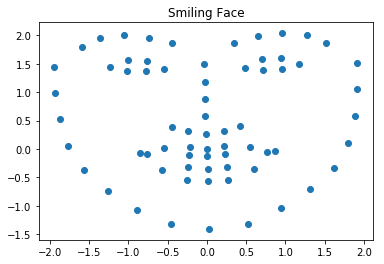

In [34]:
smile=x_train[train['smiling']==1]
x_smile=smile[even]
y_smile=smile[odd]
x_smile_mean=np.mean(x_smile)
y_smile_mean=np.mean(y_smile)
plt.scatter(x_smile_mean,y_smile_mean)
plt.title('Smiling Face')

Text(0.5,1,'Not Smiling Face')

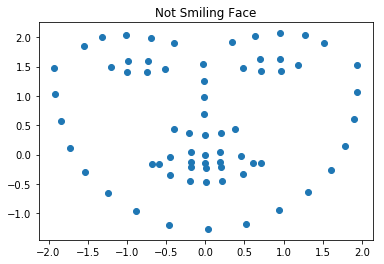

In [43]:
no_smile=x_train[train['smiling']==0]
x_no_smile=no_smile[even]
y_no_smile=no_smile[odd]
x_no_smile_mean=np.mean(x_no_smile)
y_no_smile_mean=np.mean(y_no_smile)
plt.scatter(x_no_smile_mean,y_no_smile_mean)
plt.title('Not Smiling Face')

In [58]:
dt=DecisionTreeClassifier(max_depth=2,random_state=2001)
dt.fit(x_train,train['smiling'])
print(dt.score(x_train,train['smiling']))
dt.score(x_test,test['smiling'])

0.7947916666666667


0.7816666666666666

In [5]:
dt2=DecisionTreeClassifier(max_depth=8,random_state=2001)
dt2.fit(x_train,train['smiling'])
print(dt2.score(x_train,train['smiling']))
dt2.score(x_test,test['smiling'])

0.9335416666666667


0.8408333333333333

In [60]:
dt3=DecisionTreeClassifier(max_depth=20,random_state=2001)
dt3.fit(x_train,train['smiling'])
print(dt3.score(x_train,train['smiling']))
dt3.score(x_test,test['smiling'])

1.0


0.8158333333333333

In [24]:
#train.iloc[:,np.argmax(dt2.feature_importances_)]
sorted_zip=sorted(zip(x_train.columns,dt2.feature_importances_),reverse=True,key=lambda x:x[1])[:3]
sorted_zip

[('x50', 0.33040484928175073),
 ('y48', 0.08995881431599788),
 ('y29', 0.08831447209293988)]

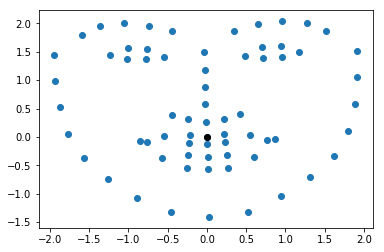

In [41]:

plt.scatter(x_smile_mean,y_smile_mean)
plt.scatter(x_smile_mean[51],y_smile_mean[51],color='black')

In [38]:
x_smile_mean

x0    -1.940654
x1    -1.929619
x2    -1.872268
x3    -1.763248
x4    -1.566910
x5    -1.261033
x6    -0.887573
x7    -0.462251
x8     0.031814
x9     0.527354
x10    0.947207
x11    1.315673
x12    1.612282
x13    1.792559
x14    1.882252
x15    1.916313
x16    1.906625
x17   -1.594877
x18   -1.361812
x19   -1.055375
x20   -0.739406
x21   -0.445030
x22    0.350763
x23    0.643865
x24    0.960266
x25    1.273234
x26    1.515521
x27   -0.036227
x28   -0.030045
x29   -0.025163
         ...   
x38   -0.760418
x39   -0.541345
x40   -0.771175
x41   -1.016654
x42    0.479351
x43    0.695885
x44    0.944675
x45    1.171914
x46    0.959017
x47    0.714218
x48   -0.853971
x49   -0.546067
x50   -0.221012
x51    0.000000
x52    0.220462
x53    0.552371
x54    0.866343
x55    0.593394
x56    0.272671
x57    0.011156
x58   -0.248616
x59   -0.571563
x60   -0.757294
x61   -0.227083
x62    0.002066
x63    0.231928
x64    0.769910
x65    0.250046
x66    0.007355
x67   -0.235599
Length: 68, dtype: float